<h1><center>Segmentación de imagenes: Método de conjunto de nivel</center></h1>
<center><strong>Análisis Numérico de Ecuaciones en Derivadas Parciales:Teoría y Laboratorio</strong></center>
<center>Autores: Felipe Urrutia, Daniel Minaya, Sebastian Toloza</center>
<center>Tutor: Axel Osses A., Auxiliar: Emir N. Chacra</center>

# Primeros resultados

Estudio del conjunto de imagenes de los [Problemas de Bongard](https://www.foundalis.com/res/bps/bpidx.htm)

In [67]:
import platform
from class_levelsetmethod import LevelSetMethod, Image, np, plt, animation, os, pickle, ListedColormap
platform.processor()

In [2]:
%%time
bp_images = ["BP097_11", "BP063_0", "BP001_10", "BP012_8", "BP029_10", "BP025_11", "BP097_7", "BP071_10"]
path_save_file_per_test = {}
dic_img_arr = {}
for id_name in bp_images:
    img_o = Image.open(f"dataset/dataset_bp/{id_name}.jpg")
    dim = (img_o.size[0], img_o.size[1])
    img = np.array(img_o.getdata()).reshape((dim[0], dim[1]))
    dic_img_arr[id_name] = img

Wall time: 383 ms


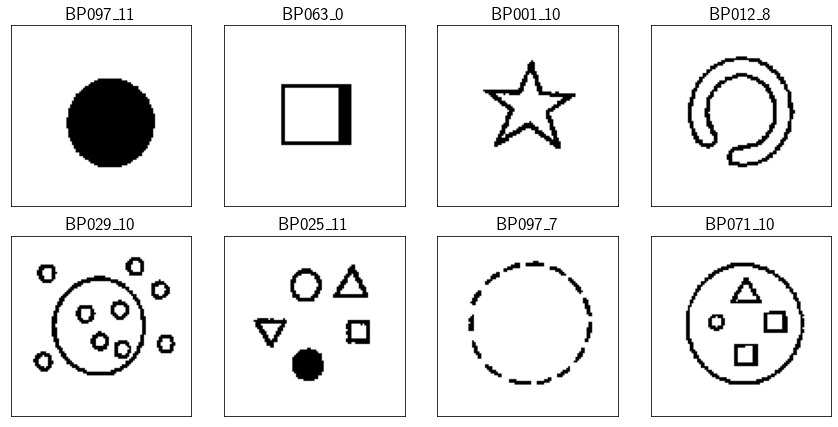

In [167]:
fig, ax = plt.subplots(2, 4, figsize=(4*3, 2*3))
for k, id_name in enumerate(bp_images):
    img = dic_img_arr[id_name]
    i, j = k//4, k%4
    axij = ax[i, j]
    axij.imshow(img, cmap="gray")
    axij.set_xticks([])
    axij.set_yticks([])
    axij.set_title(id_name, size=18)
plt.tight_layout()
fig.savefig(f"BP_images.pdf", bbox_inches='tight')

<set_image> img: <class 'numpy.ndarray'>, reshape: True, norm: True
|img_dim:     [98 98]
|img_min/max: (0, 255)
|new_img_min/max(norm): (0, 255)
|size_domain: 9604
</set_image>
Wall time: 57.1 ms


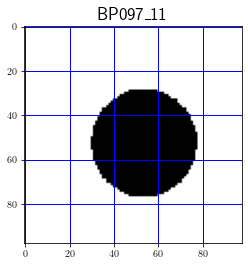

In [3]:
%%time
id_name = bp_images[0]
segmentator = LevelSetMethod(id_name=id_name)
segmentator.set_image(
    dic_img_arr[id_name], 
    reshape=True,
    norm=True
)
segmentator.show_image(grid=True)

Wall time: 145 ms


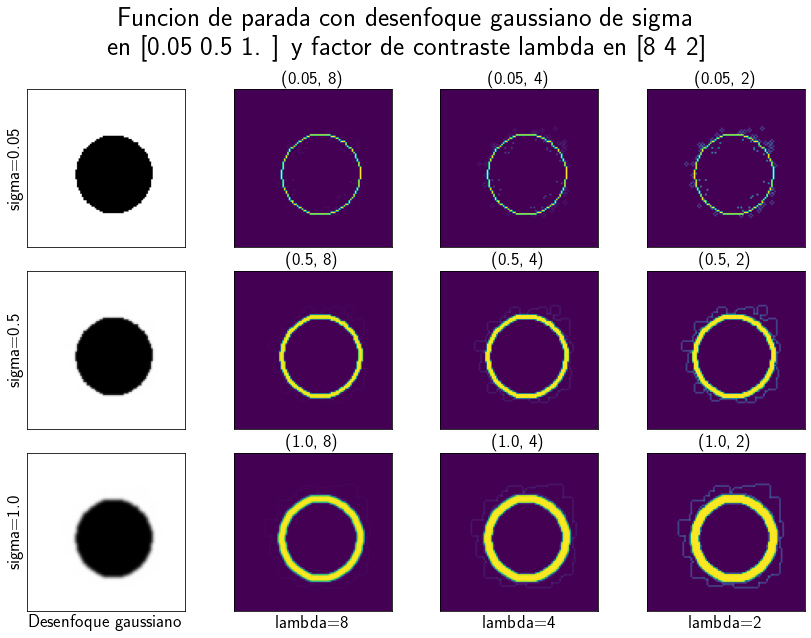

In [4]:
%%time
segmentator.eval_stopfunct(
    list_sgm=np.array([0.05, 0.5, 1]), 
    list_lmbd=np.array([8, 4, 2]),
    cmap="viridis_r"
)

In [5]:
%%time
segmentator.set_stopfunct(
    sgm=0.05, 
    lmbd=8,
)

<set_stopfunct> sigma: 0.05, lambda: 8
|gauss_min/max: (0, 255)
|stopfunct_min/max:     (0.0004918687939992007, 1.0)
</set_stopfunct>
Wall time: 1.48 ms


Wall time: 20 ms


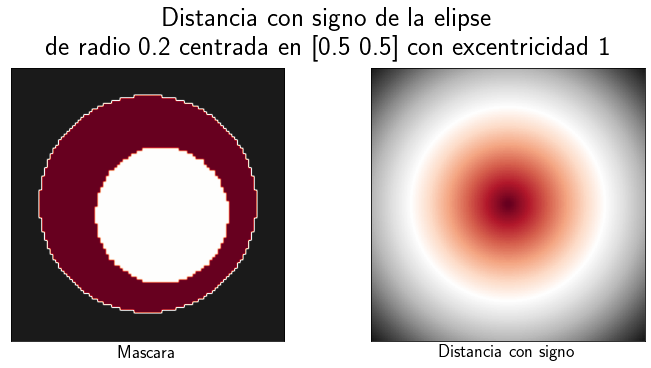

In [6]:
%%time
segmentator.eval_sgndist(
    c=np.array([0.5, 0.5]), 
    r=0.2,
    e=1
)

In [7]:
%%time
segmentator.set_sgndist(
    c=np.array([0.5, 0.5]), 
    r=0.2,
    e=1
)

<set_sgndist> centro: [0.5 0.5], radio: 0.2, excentricidad: 1
</set_sgndist>
Wall time: 1 ms


Wall time: 49 ms


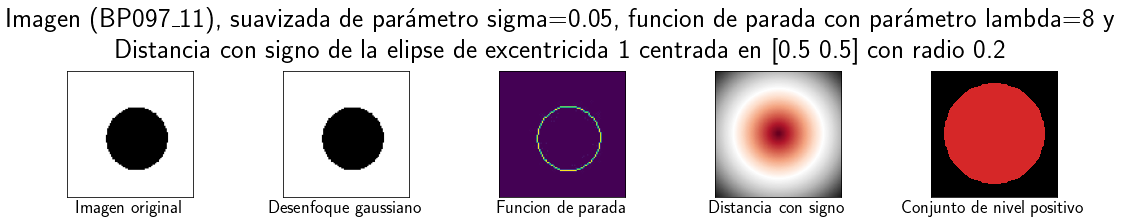

In [8]:
%%time 
segmentator.show_setting(cmap_stopfunct="viridis_r")

In [9]:
%%time 
segmentator.print_setting()

<print_setting>
|sigma: 0.05
|lambda: 8
|centro: [0.5 0.5]
|radio: 0.2
|excentricidad: 1
</print_setting>
Wall time: 0 ns


In [10]:
%%time
segmentator.solve(
    n_iter = 50,
    tau = 5,
    k = -0.1,
    save_rate=10,
    root_path_save="results",
    show_log_rate=5
)

<solve> N° iteraciones: 50, discretizacion en tiempo: 5, constante k: -0.1
|path_save_file: results/BP097_11__iterations_times__sgm_0_05__lmbd_8__cx_0_5__cy_0_5__r_0_2__e_1__tau_5__k_-0_1
|Iter: 1, T iter: 2.1s, T trans:  4.2s, T per iter: 2.1s p/m  0.0s, T rest:  105.2s p/m  0.1s
|Iter: 6, T iter: 2.1s, T trans:  14.8s, T per iter: 2.1s p/m  0.0s, T rest:  95.1s p/m  0.1s
|Iter: 11, T iter: 2.5s, T trans:  25.8s, T per iter: 2.2s p/m  0.1s, T rest:  86.0s p/m  0.6s
|Iter: 16, T iter: 2.2s, T trans:  36.4s, T per iter: 2.1s p/m  0.1s, T rest:  75.0s p/m  0.5s
|Iter: 21, T iter: 2.5s, T trans:  47.5s, T per iter: 2.2s p/m  0.1s, T rest:  64.7s p/m  0.6s
|Iter: 26, T iter: 2.1s, T trans:  58.1s, T per iter: 2.2s p/m  0.1s, T rest:  53.8s p/m  0.5s
|Iter: 31, T iter: 2.5s, T trans:  69.4s, T per iter: 2.2s p/m  0.1s, T rest:  43.3s p/m  0.5s
|Iter: 36, T iter: 2.1s, T trans:  80.0s, T per iter: 2.2s p/m  0.1s, T rest:  32.4s p/m  0.4s
|Iter: 41, T iter: 2.2s, T trans:  90.6s, T per iter: 

Wall time: 68 ms


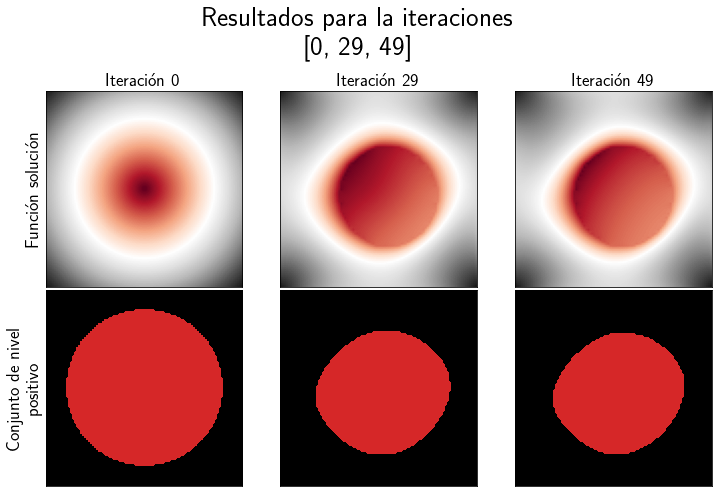

In [11]:
%%time
segmentator.show_solution(
    show_iters=[0, 29, 49]
)

In [12]:
path_save_file_per_test["test_0"] = segmentator.path_save_file

In [13]:
%%time
segmentator.solve(
    n_iter = 50,
    tau = 0.1,
    k = -5,
    save_rate=10,
    root_path_save="results",
    show_log_rate=5
)

<solve> N° iteraciones: 50, discretizacion en tiempo: 0.1, constante k: -5
|path_save_file: results/BP097_11__iterations_times__sgm_0_05__lmbd_8__cx_0_5__cy_0_5__r_0_2__e_1__tau_0_1__k_-5
|Iter: 1, T iter: 2.1s, T trans:  4.2s, T per iter: 2.1s p/m  0.0s, T rest:  105.0s p/m  0.2s
|Iter: 6, T iter: 2.1s, T trans:  14.8s, T per iter: 2.1s p/m  0.0s, T rest:  95.2s p/m  0.1s
|Iter: 11, T iter: 2.5s, T trans:  25.7s, T per iter: 2.1s p/m  0.1s, T rest:  85.8s p/m  0.7s
|Iter: 16, T iter: 2.1s, T trans:  36.3s, T per iter: 2.1s p/m  0.1s, T rest:  74.8s p/m  0.5s
|Iter: 21, T iter: 2.5s, T trans:  47.3s, T per iter: 2.1s p/m  0.1s, T rest:  64.5s p/m  0.6s
|Iter: 26, T iter: 2.1s, T trans:  57.9s, T per iter: 2.1s p/m  0.1s, T rest:  53.6s p/m  0.5s
|Iter: 31, T iter: 2.5s, T trans:  68.8s, T per iter: 2.2s p/m  0.1s, T rest:  43.0s p/m  0.5s
|Iter: 36, T iter: 2.1s, T trans:  79.4s, T per iter: 2.1s p/m  0.1s, T rest:  32.2s p/m  0.4s
|Iter: 41, T iter: 2.5s, T trans:  90.4s, T per iter: 

Wall time: 68.1 ms


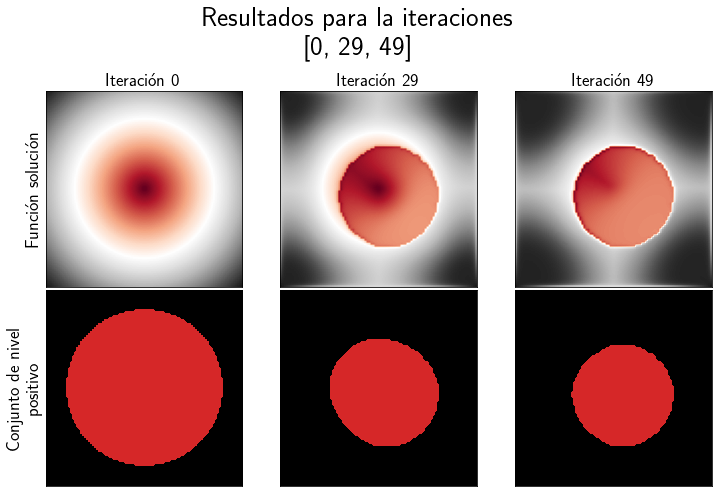

In [14]:
%%time
segmentator.show_solution(
    show_iters=[0, 29, 49]
)

In [15]:
path_save_file_per_test["test_1"] = segmentator.path_save_file

<set_image> img: <class 'numpy.ndarray'>, reshape: True, norm: True
|img_dim:     [98 98]
|img_min/max: (0, 255)
|new_img_min/max(norm): (0, 255)
|size_domain: 9604
</set_image>
<set_stopfunct> sigma: 0.05, lambda: 8
|gauss_min/max: (0, 255)
|stopfunct_min/max:     (0.0004918725742612304, 1.0)
</set_stopfunct>
Wall time: 14 ms


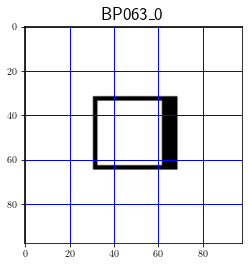

In [16]:
%%time
id_name = bp_images[1]
segmentator = LevelSetMethod(id_name=id_name)
segmentator.set_image(
    dic_img_arr[id_name], 
    reshape=True,
    norm=True
)
segmentator.show_image(grid=True)
segmentator.set_stopfunct(
    sgm=0.05, 
    lmbd=8,
)

Wall time: 18 ms


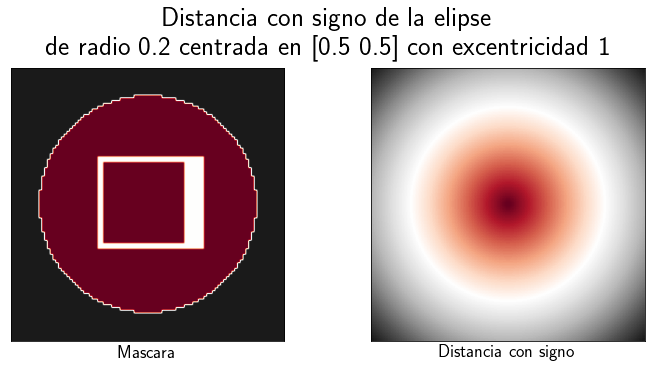

In [17]:
%%time
segmentator.eval_sgndist(
    c=np.array([0.5, 0.5]), 
    r=0.2,
    e=1
)

In [18]:
%%time
segmentator.set_sgndist(
    c=np.array([0.5, 0.5]), 
    r=0.2,
    e=1
)

<set_sgndist> centro: [0.5 0.5], radio: 0.2, excentricidad: 1
</set_sgndist>
Wall time: 1e+03 µs


In [19]:
%%time
segmentator.solve(
    n_iter = 50,
    tau = 0.1,
    k = -5,
    save_rate=10,
    root_path_save="results",
    show_log_rate=5
)

<solve> N° iteraciones: 50, discretizacion en tiempo: 0.1, constante k: -5
|path_save_file: results/BP063_0__iterations_times__sgm_0_05__lmbd_8__cx_0_5__cy_0_5__r_0_2__e_1__tau_0_1__k_-5
|Iter: 1, T iter: 2.1s, T trans:  4.2s, T per iter: 2.1s p/m  0.0s, T rest:  105.3s p/m  0.2s
|Iter: 6, T iter: 2.1s, T trans:  14.8s, T per iter: 2.1s p/m  0.0s, T rest:  95.4s p/m  0.1s
|Iter: 11, T iter: 2.5s, T trans:  25.7s, T per iter: 2.1s p/m  0.1s, T rest:  85.8s p/m  0.6s
|Iter: 16, T iter: 2.1s, T trans:  36.3s, T per iter: 2.1s p/m  0.1s, T rest:  74.7s p/m  0.5s
|Iter: 21, T iter: 2.5s, T trans:  47.3s, T per iter: 2.1s p/m  0.1s, T rest:  64.5s p/m  0.6s
|Iter: 26, T iter: 2.1s, T trans:  57.9s, T per iter: 2.1s p/m  0.1s, T rest:  53.6s p/m  0.5s
|Iter: 31, T iter: 2.5s, T trans:  68.9s, T per iter: 2.2s p/m  0.1s, T rest:  43.1s p/m  0.5s
|Iter: 36, T iter: 2.1s, T trans:  79.5s, T per iter: 2.1s p/m  0.1s, T rest:  32.2s p/m  0.4s
|Iter: 41, T iter: 2.2s, T trans:  90.2s, T per iter: 2

Wall time: 113 ms


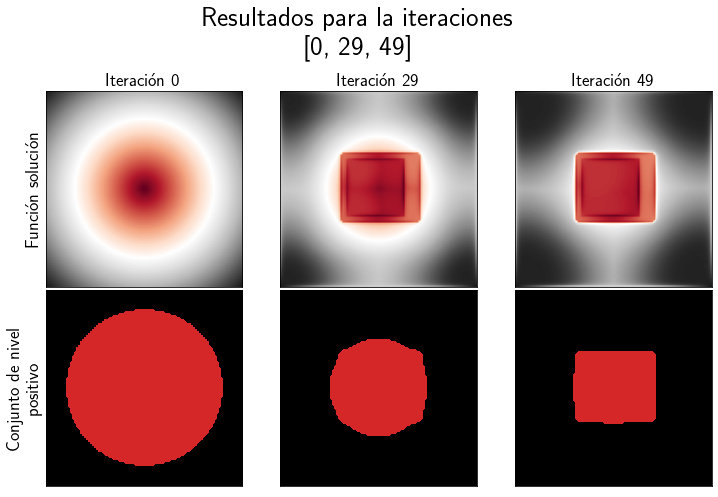

In [20]:
%%time
segmentator.show_solution(
    show_iters=[0, 29, 49]
)

In [21]:
path_save_file_per_test["test_2"] = segmentator.path_save_file

<set_image> img: <class 'numpy.ndarray'>, reshape: True, norm: True
|img_dim:     [98 98]
|img_min/max: (0, 255)
|new_img_min/max(norm): (0, 255)
|size_domain: 9604
</set_image>
<set_stopfunct> sigma: 0.05, lambda: 8
|gauss_min/max: (0, 255)
|stopfunct_min/max:     (0.00032797134350386135, 1.0)
</set_stopfunct>
Wall time: 13 ms


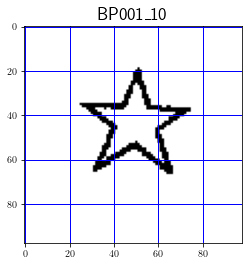

In [22]:
%%time
id_name = bp_images[2]
segmentator = LevelSetMethod(id_name=id_name)
segmentator.set_image(
    dic_img_arr[id_name], 
    reshape=True,
    norm=True
)
segmentator.show_image(grid=True)
segmentator.set_stopfunct(
    sgm=0.05, 
    lmbd=8,
)

Wall time: 18 ms


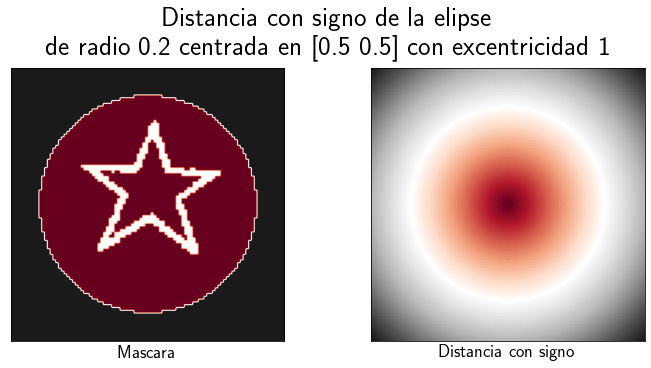

In [23]:
%%time
segmentator.eval_sgndist(
    c=np.array([0.5, 0.5]), 
    r=0.2,
    e=1
)

In [24]:
%%time
segmentator.set_sgndist(
    c=np.array([0.5, 0.5]), 
    r=0.2,
    e=1
)

<set_sgndist> centro: [0.5 0.5], radio: 0.2, excentricidad: 1
</set_sgndist>
Wall time: 1 ms


In [25]:
%%time
segmentator.solve(
    n_iter = 100,
    tau = 0.1,
    k = -5,
    save_rate=10,
    root_path_save="results",
    show_log_rate=5
)

<solve> N° iteraciones: 100, discretizacion en tiempo: 0.1, constante k: -5
|path_save_file: results/BP001_10__iterations_times__sgm_0_05__lmbd_8__cx_0_5__cy_0_5__r_0_2__e_1__tau_0_1__k_-5
|Iter: 1, T iter: 2.1s, T trans:  4.2s, T per iter: 2.1s p/m  0.0s, T rest:  211.8s p/m  0.3s
|Iter: 6, T iter: 2.2s, T trans:  15.1s, T per iter: 2.2s p/m  0.0s, T rest:  204.4s p/m  0.3s
|Iter: 11, T iter: 2.1s, T trans:  25.4s, T per iter: 2.1s p/m  0.1s, T rest:  190.8s p/m  0.5s
|Iter: 16, T iter: 2.1s, T trans:  35.8s, T per iter: 2.1s p/m  0.0s, T rest:  178.8s p/m  0.5s
|Iter: 21, T iter: 2.5s, T trans:  46.7s, T per iter: 2.1s p/m  0.1s, T rest:  169.8s p/m  0.9s
|Iter: 26, T iter: 2.2s, T trans:  57.2s, T per iter: 2.1s p/m  0.1s, T rest:  158.8s p/m  0.8s
|Iter: 31, T iter: 2.5s, T trans:  68.2s, T per iter: 2.1s p/m  0.1s, T rest:  149.2s p/m  0.9s
|Iter: 36, T iter: 2.1s, T trans:  78.7s, T per iter: 2.1s p/m  0.1s, T rest:  138.3s p/m  0.8s
|Iter: 41, T iter: 2.4s, T trans:  89.5s, T pe

Wall time: 1.15 s


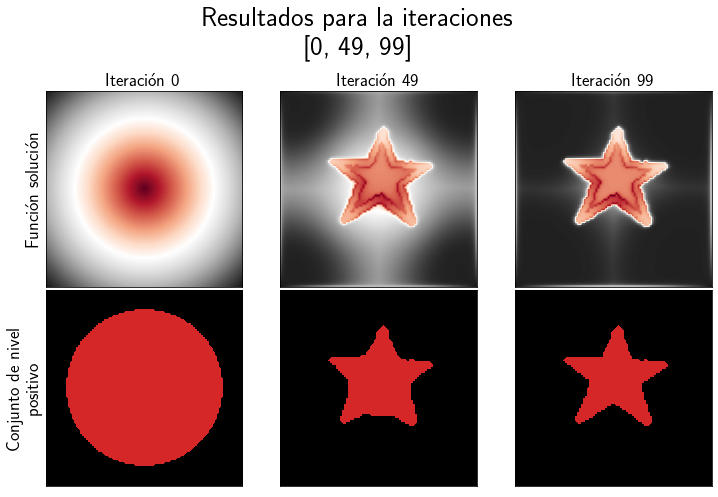

In [26]:
%%time
segmentator.show_solution(
    show_iters=[0, 49, 99]
)

In [27]:
path_save_file_per_test["test_3"] = segmentator.path_save_file

<set_image> img: <class 'numpy.ndarray'>, reshape: True, norm: True
|img_dim:     [98 98]
|img_min/max: (0, 255)
|new_img_min/max(norm): (0, 255)
|size_domain: 9604
</set_image>
<set_stopfunct> sigma: 0.05, lambda: 8
|gauss_min/max: (0, 255)
|stopfunct_min/max:     (0.00032797134350386135, 1.0)
</set_stopfunct>
Wall time: 14 ms


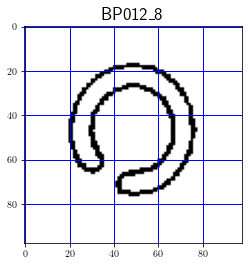

In [28]:
%%time
id_name = bp_images[3]
segmentator = LevelSetMethod(id_name=id_name)
segmentator.set_image(
    dic_img_arr[id_name], 
    reshape=True,
    norm=True
)
segmentator.show_image(grid=True)
segmentator.set_stopfunct(
    sgm=0.05, 
    lmbd=8,
)

Wall time: 18 ms


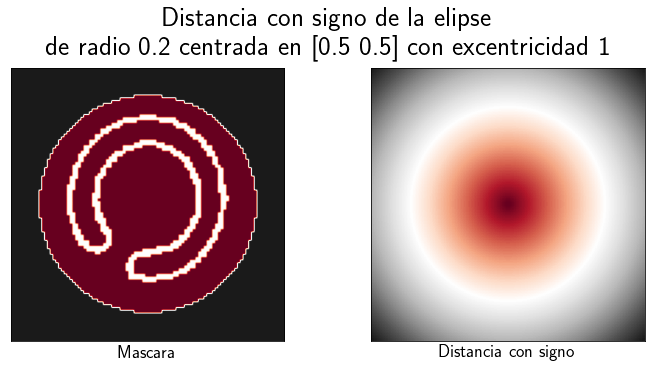

In [29]:
%%time
segmentator.eval_sgndist(
    c=np.array([0.5, 0.5]), 
    r=0.2,
    e=1
)

In [30]:
%%time
segmentator.set_sgndist(
    c=np.array([0.5, 0.5]), 
    r=0.2,
    e=1
)

<set_sgndist> centro: [0.5 0.5], radio: 0.2, excentricidad: 1
</set_sgndist>
Wall time: 1 ms


In [31]:
%%time
segmentator.solve(
    n_iter = 150,
    tau = 0.1,
    k = -5,
    save_rate=10,
    root_path_save="results",
    show_log_rate=5
)

<solve> N° iteraciones: 150, discretizacion en tiempo: 0.1, constante k: -5
|path_save_file: results/BP012_8__iterations_times__sgm_0_05__lmbd_8__cx_0_5__cy_0_5__r_0_2__e_1__tau_0_1__k_-5
|Iter: 1, T iter: 2.1s, T trans:  4.2s, T per iter: 2.1s p/m  0.0s, T rest:  315.8s p/m  0.3s
|Iter: 6, T iter: 2.2s, T trans:  15.0s, T per iter: 2.1s p/m  0.0s, T rest:  311.2s p/m  0.4s
|Iter: 11, T iter: 2.1s, T trans:  25.8s, T per iter: 2.1s p/m  0.0s, T rest:  300.7s p/m  0.3s
|Iter: 16, T iter: 2.1s, T trans:  36.5s, T per iter: 2.1s p/m  0.0s, T rest:  290.0s p/m  0.3s
|Iter: 21, T iter: 2.2s, T trans:  47.2s, T per iter: 2.1s p/m  0.0s, T rest:  278.8s p/m  0.3s
|Iter: 26, T iter: 2.1s, T trans:  57.9s, T per iter: 2.1s p/m  0.0s, T rest:  268.3s p/m  0.3s
|Iter: 31, T iter: 2.2s, T trans:  68.7s, T per iter: 2.1s p/m  0.0s, T rest:  257.7s p/m  0.3s
|Iter: 36, T iter: 2.2s, T trans:  79.5s, T per iter: 2.1s p/m  0.0s, T rest:  247.0s p/m  0.2s
|Iter: 41, T iter: 2.2s, T trans:  90.2s, T per

Wall time: 1.15 s


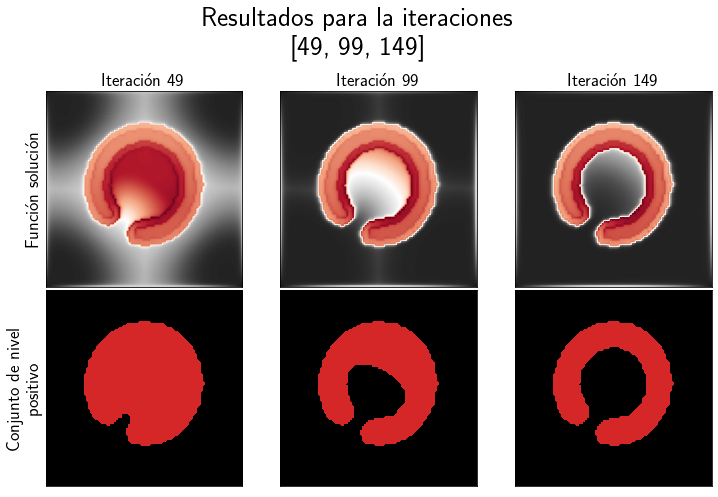

In [32]:
%%time
segmentator.show_solution(
    show_iters=[49, 99, 149]
)

In [33]:
path_save_file_per_test["test_4"] = segmentator.path_save_file

<set_image> img: <class 'numpy.ndarray'>, reshape: True, norm: True
|img_dim:     [98 98]
|img_min/max: (0, 255)
|new_img_min/max(norm): (0, 255)
|size_domain: 9604
</set_image>
<set_stopfunct> sigma: 0.05, lambda: 8
|gauss_min/max: (0, 255)
|stopfunct_min/max:     (0.00032797134350386135, 1.0)
</set_stopfunct>
Wall time: 14 ms


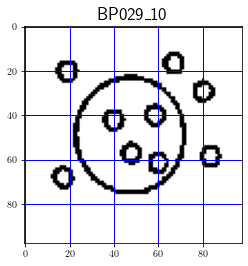

In [34]:
%%time
id_name = bp_images[4]
segmentator = LevelSetMethod(id_name=id_name)
segmentator.set_image(
    dic_img_arr[id_name], 
    reshape=True,
    norm=True
)
segmentator.show_image(grid=True)
segmentator.set_stopfunct(
    sgm=0.05, 
    lmbd=8,
)

Wall time: 18 ms


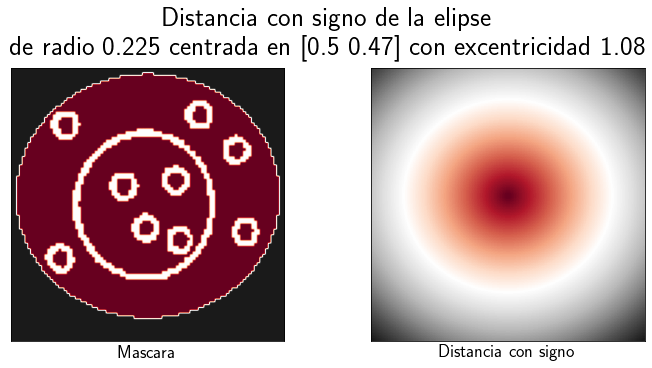

In [35]:
%%time
segmentator.eval_sgndist(
    c=np.array([0.5, 0.47]), 
    r=0.225,
    e=1.08
)

In [36]:
%%time
segmentator.set_sgndist(
    c=np.array([0.5, 0.47]), 
    r=0.225,
    e=1.08
)

<set_sgndist> centro: [0.5  0.47], radio: 0.225, excentricidad: 1.08
</set_sgndist>
Wall time: 1 ms


In [37]:
%%time
segmentator.solve(
    n_iter = 100,
    tau = 0.1,
    k = -5,
    save_rate=10,
    root_path_save="results",
    show_log_rate=5
)

<solve> N° iteraciones: 100, discretizacion en tiempo: 0.1, constante k: -5
|path_save_file: results/BP029_10__iterations_times__sgm_0_05__lmbd_8__cx_0_5__cy_0_47__r_0_225__e_1_08__tau_0_1__k_-5
|Iter: 1, T iter: 2.1s, T trans:  4.2s, T per iter: 2.1s p/m  0.0s, T rest:  211.9s p/m  0.2s
|Iter: 6, T iter: 2.1s, T trans:  15.0s, T per iter: 2.1s p/m  0.0s, T rest:  203.4s p/m  0.2s
|Iter: 11, T iter: 2.1s, T trans:  25.7s, T per iter: 2.1s p/m  0.0s, T rest:  192.7s p/m  0.2s
|Iter: 16, T iter: 2.2s, T trans:  36.4s, T per iter: 2.1s p/m  0.0s, T rest:  182.1s p/m  0.2s
|Iter: 21, T iter: 2.2s, T trans:  47.1s, T per iter: 2.1s p/m  0.0s, T rest:  171.3s p/m  0.2s
|Iter: 26, T iter: 2.2s, T trans:  57.8s, T per iter: 2.1s p/m  0.0s, T rest:  160.6s p/m  0.1s
|Iter: 31, T iter: 2.2s, T trans:  68.6s, T per iter: 2.1s p/m  0.0s, T rest:  150.0s p/m  0.1s
|Iter: 36, T iter: 2.1s, T trans:  79.3s, T per iter: 2.1s p/m  0.0s, T rest:  139.3s p/m  0.1s
|Iter: 41, T iter: 2.2s, T trans:  90.0s

Wall time: 2.03 s


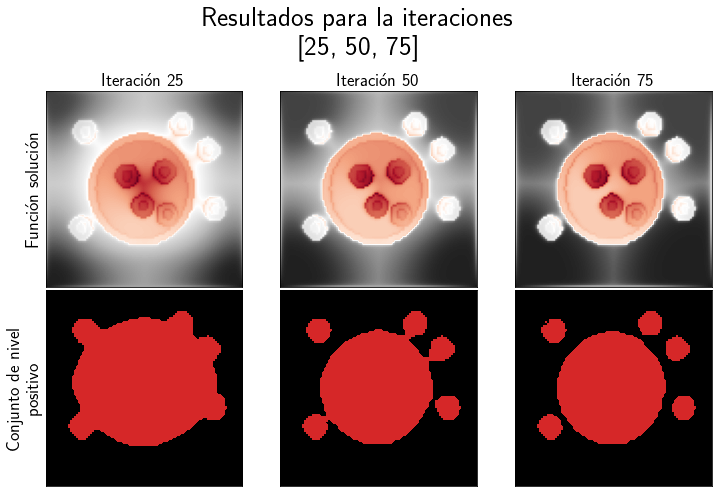

In [38]:
%%time
segmentator.show_solution(
    show_iters=[25, 50, 75]
)

In [39]:
path_save_file_per_test["test_5"] = segmentator.path_save_file

<set_image> img: <class 'numpy.ndarray'>, reshape: True, norm: True
|img_dim:     [98 98]
|img_min/max: (0, 255)
|new_img_min/max(norm): (0, 255)
|size_domain: 9604
</set_image>
<set_stopfunct> sigma: 0.05, lambda: 8
|gauss_min/max: (0, 255)
|stopfunct_min/max:     (0.00032796966280619047, 1.0)
</set_stopfunct>
Wall time: 14 ms


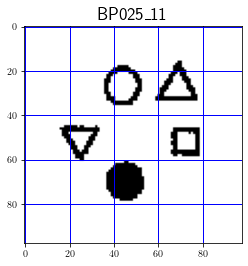

In [40]:
%%time
id_name = bp_images[5]
segmentator = LevelSetMethod(id_name=id_name)
segmentator.set_image(
    dic_img_arr[id_name], 
    reshape=True,
    norm=True
)
segmentator.show_image(grid=True)
segmentator.set_stopfunct(
    sgm=0.05, 
    lmbd=8,
)

Wall time: 18 ms


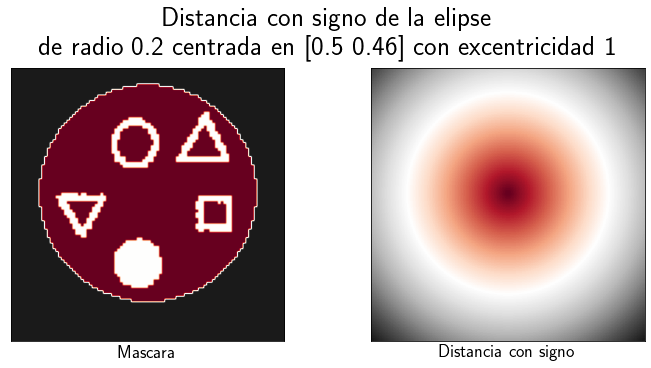

In [41]:
%%time
segmentator.eval_sgndist(
    c=np.array([0.5, 0.46]), 
    r=0.2,
    e=1
)

In [42]:
%%time
segmentator.set_sgndist(
    c=np.array([0.5, 0.46]), 
    r=0.2,
    e=1
)

<set_sgndist> centro: [0.5  0.46], radio: 0.2, excentricidad: 1
</set_sgndist>
Wall time: 1 ms


In [43]:
%%time
segmentator.solve(
    n_iter = 100,
    tau = 0.1,
    k = -5,
    save_rate=10,
    root_path_save="results",
    show_log_rate=5
)

<solve> N° iteraciones: 100, discretizacion en tiempo: 0.1, constante k: -5
|path_save_file: results/BP025_11__iterations_times__sgm_0_05__lmbd_8__cx_0_5__cy_0_46__r_0_2__e_1__tau_0_1__k_-5
|Iter: 1, T iter: 2.1s, T trans:  4.3s, T per iter: 2.1s p/m  0.0s, T rest:  213.7s p/m  0.1s
|Iter: 6, T iter: 2.2s, T trans:  15.0s, T per iter: 2.1s p/m  0.0s, T rest:  203.8s p/m  0.1s
|Iter: 11, T iter: 2.2s, T trans:  25.7s, T per iter: 2.1s p/m  0.0s, T rest:  193.0s p/m  0.1s
|Iter: 16, T iter: 2.1s, T trans:  36.4s, T per iter: 2.1s p/m  0.0s, T rest:  181.9s p/m  0.1s
|Iter: 21, T iter: 2.5s, T trans:  47.4s, T per iter: 2.2s p/m  0.1s, T rest:  172.3s p/m  0.7s
|Iter: 26, T iter: 2.2s, T trans:  58.0s, T per iter: 2.1s p/m  0.1s, T rest:  161.2s p/m  0.6s
|Iter: 31, T iter: 2.5s, T trans:  69.1s, T per iter: 2.2s p/m  0.1s, T rest:  151.2s p/m  0.8s
|Iter: 36, T iter: 2.1s, T trans:  79.8s, T per iter: 2.2s p/m  0.1s, T rest:  140.2s p/m  0.7s
|Iter: 41, T iter: 2.2s, T trans:  90.6s, T p

Wall time: 565 ms


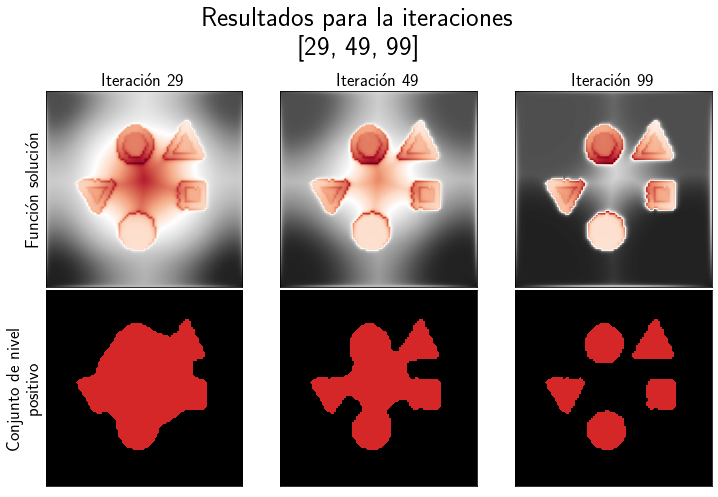

In [44]:
%%time
segmentator.show_solution(
    show_iters=[29, 49, 99]
)

In [45]:
path_save_file_per_test["test_6"] = segmentator.path_save_file

<set_image> img: <class 'numpy.ndarray'>, reshape: True, norm: True
|img_dim:     [98 98]
|img_min/max: (0, 255)
|new_img_min/max(norm): (0, 255)
|size_domain: 9604
</set_image>
<set_stopfunct> sigma: 0.05, lambda: 8
|gauss_min/max: (0, 255)
|stopfunct_min/max:     (0.00032797134350386135, 1.0)
</set_stopfunct>
Wall time: 15 ms


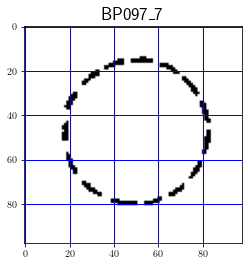

In [46]:
%%time
id_name = bp_images[6]
segmentator = LevelSetMethod(id_name=id_name)
segmentator.set_image(
    dic_img_arr[id_name], 
    reshape=True,
    norm=True
)
segmentator.show_image(grid=True)
segmentator.set_stopfunct(
    sgm=0.05, 
    lmbd=8,
)

Wall time: 18 ms


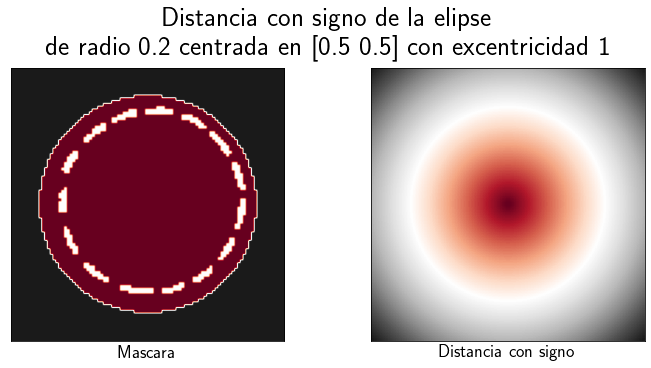

In [47]:
%%time
segmentator.eval_sgndist(
    c=np.array([0.5, 0.5]), 
    r=0.2,
    e=1
)

In [48]:
%%time
segmentator.set_sgndist(
    c=np.array([0.5, 0.5]), 
    r=0.2,
    e=1
)

<set_sgndist> centro: [0.5 0.5], radio: 0.2, excentricidad: 1
</set_sgndist>
Wall time: 1 ms


In [49]:
%%time
segmentator.solve(
    n_iter = 100,
    tau = 0.1,
    k = -5,
    save_rate=10,
    root_path_save="results",
    show_log_rate=5
)

<solve> N° iteraciones: 100, discretizacion en tiempo: 0.1, constante k: -5
|path_save_file: results/BP097_7__iterations_times__sgm_0_05__lmbd_8__cx_0_5__cy_0_5__r_0_2__e_1__tau_0_1__k_-5
|Iter: 1, T iter: 2.1s, T trans:  4.1s, T per iter: 2.1s p/m  0.0s, T rest:  205.1s p/m  0.4s
|Iter: 6, T iter: 2.1s, T trans:  14.5s, T per iter: 2.1s p/m  0.0s, T rest:  197.2s p/m  0.3s
|Iter: 11, T iter: 2.5s, T trans:  25.4s, T per iter: 2.1s p/m  0.1s, T rest:  190.5s p/m  1.0s
|Iter: 16, T iter: 2.1s, T trans:  35.8s, T per iter: 2.1s p/m  0.1s, T rest:  179.2s p/m  0.9s
|Iter: 21, T iter: 2.4s, T trans:  46.6s, T per iter: 2.1s p/m  0.1s, T rest:  169.5s p/m  1.0s
|Iter: 26, T iter: 2.1s, T trans:  57.1s, T per iter: 2.1s p/m  0.1s, T rest:  158.6s p/m  0.9s
|Iter: 31, T iter: 2.1s, T trans:  67.5s, T per iter: 2.1s p/m  0.1s, T rest:  147.6s p/m  0.8s
|Iter: 36, T iter: 2.1s, T trans:  78.0s, T per iter: 2.1s p/m  0.1s, T rest:  137.1s p/m  0.7s
|Iter: 41, T iter: 2.1s, T trans:  88.5s, T per

Wall time: 1.03 s


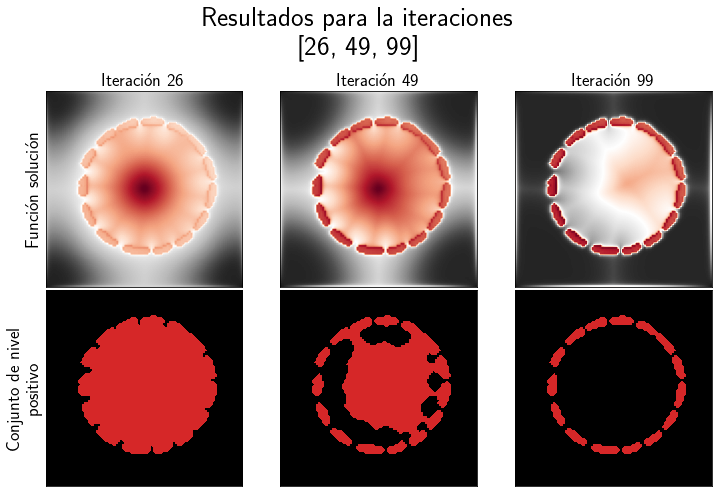

In [50]:
%%time
segmentator.show_solution(
    show_iters=[26, 49, 99]
)

In [51]:
path_save_file_per_test["test_7"] = segmentator.path_save_file

<set_image> img: <class 'numpy.ndarray'>, reshape: True, norm: True
|img_dim:     [98 98]
|img_min/max: (0, 255)
|new_img_min/max(norm): (0, 255)
|size_domain: 9604
</set_image>
<set_stopfunct> sigma: 0.05, lambda: 8
|gauss_min/max: (0, 255)
|stopfunct_min/max:     (0.00024599867775710704, 1.0)
</set_stopfunct>
Wall time: 14 ms


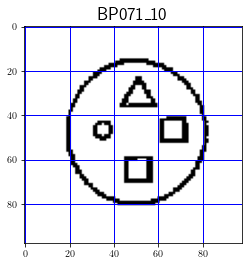

In [52]:
%%time
id_name = bp_images[7]
segmentator = LevelSetMethod(id_name=id_name)
segmentator.set_image(
    dic_img_arr[id_name], 
    reshape=True,
    norm=True
)
segmentator.show_image(grid=True)
segmentator.set_stopfunct(
    sgm=0.05, 
    lmbd=8,
)

Wall time: 65.1 ms


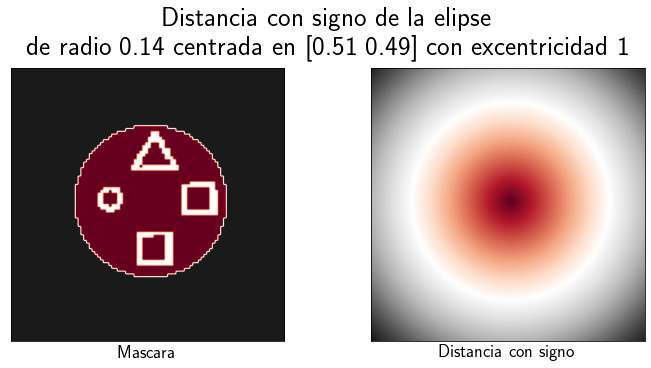

In [53]:
%%time
segmentator.eval_sgndist(
    c=np.array([0.51, 0.49]), 
    r=0.14,
    e=1
)

In [54]:
%%time
segmentator.set_sgndist(
    c=np.array([0.51, 0.49]), 
    r=0.14,
    e=1
)

<set_sgndist> centro: [0.51 0.49], radio: 0.14, excentricidad: 1
</set_sgndist>
Wall time: 1 ms


In [55]:
%%time
segmentator.solve(
    n_iter = 100,
    tau = 0.1,
    k = -5,
    save_rate=10,
    root_path_save="results",
    show_log_rate=5
)

<solve> N° iteraciones: 100, discretizacion en tiempo: 0.1, constante k: -5
|path_save_file: results/BP071_10__iterations_times__sgm_0_05__lmbd_8__cx_0_51__cy_0_49__r_0_14__e_1__tau_0_1__k_-5
|Iter: 1, T iter: 2.1s, T trans:  4.2s, T per iter: 2.1s p/m  0.0s, T rest:  209.0s p/m  0.3s
|Iter: 6, T iter: 2.1s, T trans:  14.6s, T per iter: 2.1s p/m  0.0s, T rest:  198.7s p/m  0.2s
|Iter: 11, T iter: 2.5s, T trans:  25.5s, T per iter: 2.1s p/m  0.1s, T rest:  191.2s p/m  1.0s
|Iter: 16, T iter: 2.1s, T trans:  35.9s, T per iter: 2.1s p/m  0.1s, T rest:  179.7s p/m  0.8s
|Iter: 21, T iter: 2.5s, T trans:  46.9s, T per iter: 2.1s p/m  0.1s, T rest:  170.6s p/m  0.9s
|Iter: 26, T iter: 2.1s, T trans:  57.4s, T per iter: 2.1s p/m  0.1s, T rest:  159.3s p/m  0.8s
|Iter: 31, T iter: 2.5s, T trans:  68.2s, T per iter: 2.1s p/m  0.1s, T rest:  149.3s p/m  0.9s
|Iter: 36, T iter: 2.1s, T trans:  78.9s, T per iter: 2.1s p/m  0.1s, T rest:  138.6s p/m  0.8s
|Iter: 41, T iter: 2.5s, T trans:  89.9s, T

Wall time: 69.1 ms


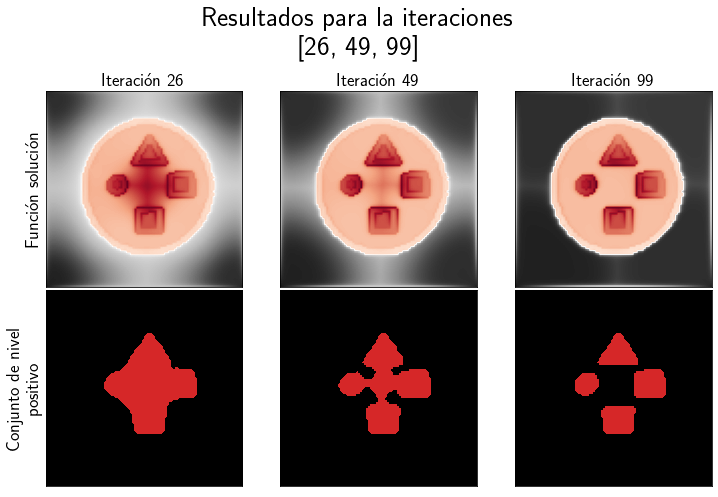

In [56]:
%%time
segmentator.show_solution(
    show_iters=[26, 49, 99]
)

In [57]:
path_save_file_per_test["test_8"] = segmentator.path_save_file

# Graficos

## Estaticos

results/BP097_11__iterations_times__sgm_0_05__lmbd_8__cx_0_5__cy_0_5__r_0_2__e_1__tau_0_1__k_-5
Wall time: 545 ms


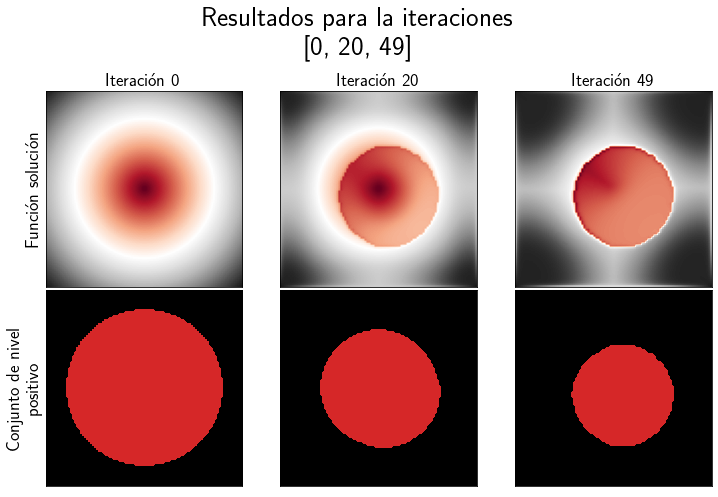

In [122]:
%%time
test_k = "test_1"
print(path_save_file_per_test[test_k])
iterations, times = pickle.load(open(path_save_file_per_test[test_k]+".pickle", "rb"))

show_iters = [0, 20, 49]

fig, ax = plt.subplots(2, 3, figsize=(3*3.5, 3.5*2), constrained_layout=False, gridspec_kw={"width_ratios": [1, 1, 1]})
        
cmap_sgndist = "RdGy_r"

for k, iter_k in enumerate(show_iters):
    # Funciones
    im = ax[0, k].imshow(iterations[iter_k], cmap=cmap_sgndist)
    ax[0, k].set_xticks([])
    ax[0, k].set_yticks([])
    ax[0, k].set_title(f"Iteración {iter_k}", size=18)

    # Curvas
    im = ax[1, k].imshow((iterations[iter_k]>0), cmap=ListedColormap(['black','tab:red']))
    ax[1, k].set_xticks([])
    ax[1, k].set_yticks([])

    if k == 0:
        ax[0, 0].set_ylabel("Función solución", size=18)
        ax[1, 0].set_ylabel("Conjunto de nivel\npositivo", size=18)

plt.suptitle(f"Resultados para la iteraciones\n{show_iters}", size=18*1.5)
fig.tight_layout(h_pad=0.01, w_pad=0.5)
fig.savefig(f"BP_{test_k}.pdf", bbox_inches='tight')

## Dinamicos

In [123]:
%%time
iterations_0, _ = pickle.load(open(path_save_file_per_test["test_0"]+".pickle", "rb"))
iterations_1, _ = pickle.load(open(path_save_file_per_test["test_1"]+".pickle", "rb"))
print(path_save_file_per_test["test_0"], path_save_file_per_test["test_1"], sep="\n")

results/BP097_11__iterations_times__sgm_0_05__lmbd_8__cx_0_5__cy_0_5__r_0_2__e_1__tau_5__k_-0_1
results/BP097_11__iterations_times__sgm_0_05__lmbd_8__cx_0_5__cy_0_5__r_0_2__e_1__tau_0_1__k_-5
Wall time: 4 ms


Wall time: 124 ms


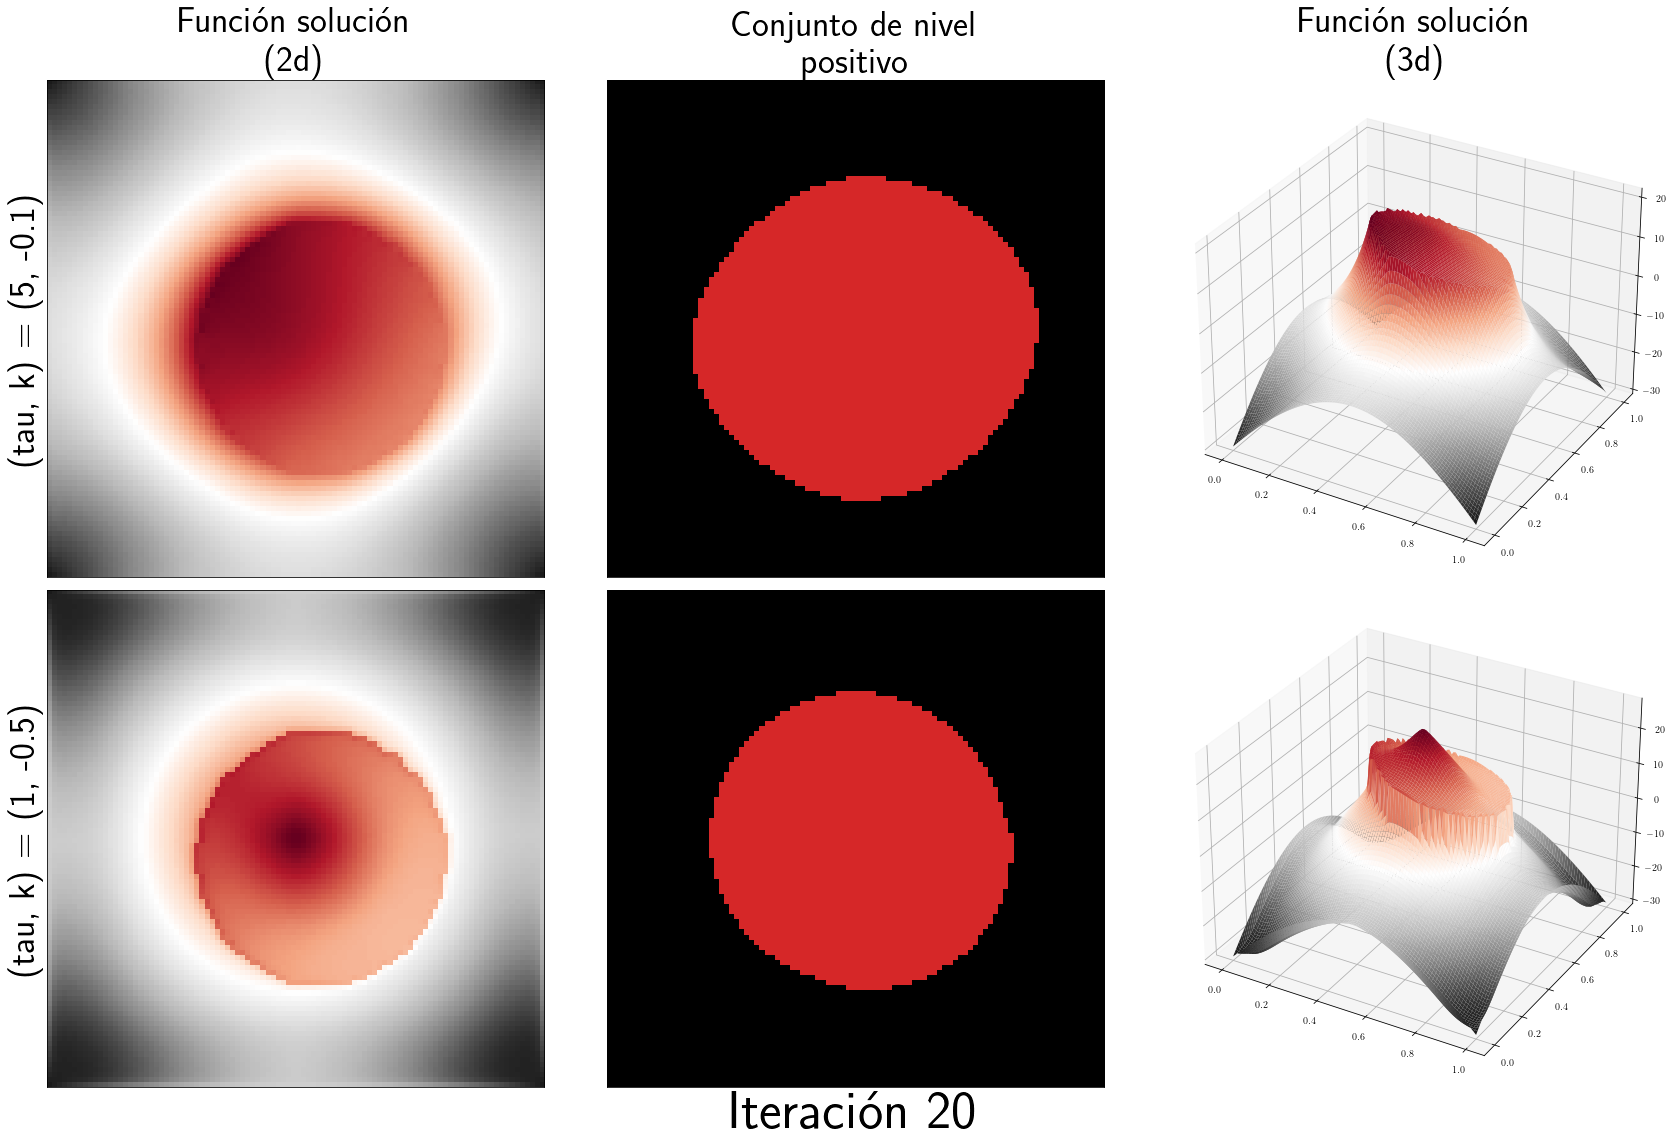

In [149]:
%%time
fig = plt.figure(figsize=(8*3,8*2))

dim = [98, 98]
cmap_sgndist = "RdGy_r"

x = np.linspace(0, 1, dim[0])
y = np.linspace(0, 1, dim[1])
xx, yy = np.meshgrid(x, y)

ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(232)
ax3 = fig.add_subplot(233, projection='3d')

ax4 = fig.add_subplot(234)
ax5 = fig.add_subplot(235)
ax6 = fig.add_subplot(236, projection='3d')

iter_k = 20

zz_0 = iterations_0[iter_k]
zz_1 = iterations_1[iter_k]

ax1.imshow(zz_0, cmap=cmap_sgndist)
ax1.set_xticks([])
ax1.set_yticks([])
    
ax4.imshow(zz_1, cmap=cmap_sgndist)
ax4.set_xticks([])
ax4.set_yticks([])

ax2.imshow((zz_0>0), cmap=ListedColormap(['black','tab:red']))
ax2.set_xticks([])
ax2.set_yticks([])

ax5.imshow((zz_1>0), cmap=ListedColormap(['black','tab:red']))
ax5.set_xticks([])
ax5.set_yticks([])

z_0 = np.ravel(zz_0)
z_1 = np.ravel(zz_1)

ax3.plot_surface(xx, yy, zz_0, rstride=1, cstride=1, cmap='RdGy_r', edgecolor='none');
ax6.plot_surface(xx, yy, zz_1, rstride=1, cstride=1, cmap='RdGy_r', edgecolor='none');

ax1.set_title("Función solución\n(2d)", size=18*2)
ax2.set_title("Conjunto de nivel\npositivo", size=18*2)
ax3.set_title("Función solución\n(3d)", size=18*2)

ax1.set_ylabel(r"(tau, k) = (5, -0.1)", size=18*2)
ax4.set_ylabel(r"(tau, k) = (1, -0.5)", size=18*2)

ax5.set_xlabel(f"Iteración {iter_k}", size=18*3)

plt.tight_layout()

MovieWriter ffmpeg unavailable; using Pillow instead.


Wall time: 1min 2s


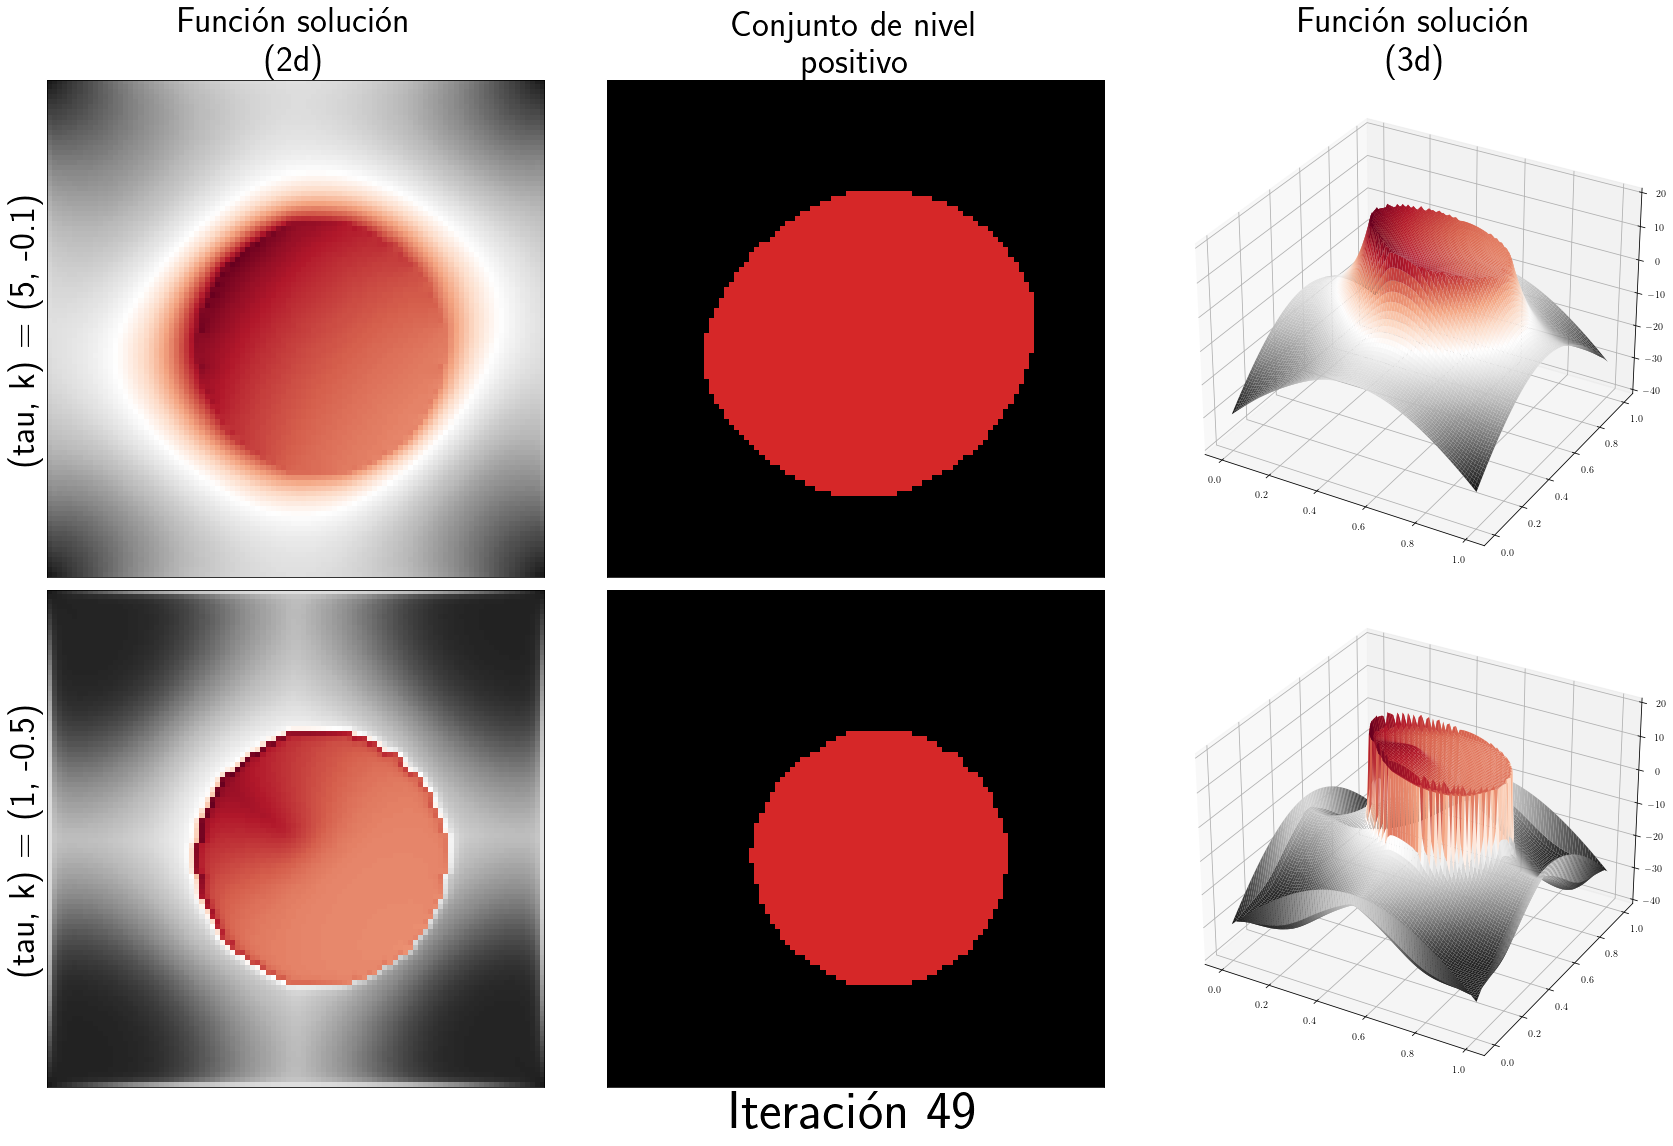

In [156]:
%%time
fps = 250
frn = 50

dim = [98, 98]

x = np.linspace(0, 1, dim[0])
y = np.linspace(0, 1, dim[1])
xx, yy = np.meshgrid(x, y)

zarray_0 = np.zeros((dim[0], dim[1], frn))
zarray_1 = np.zeros((dim[0], dim[1], frn))

for i in range(frn):
    zarray_0[:, :, i] = iterations_0[i]
    zarray_1[:, :, i] = iterations_1[i]

zarray = np.array([zarray_0, zarray_1])

def change_plot(frame_number, zarray, plot):
    plot[0].remove()
    plot[0] = ax1.imshow(zarray[0][:, :, frame_number], cmap="RdGy_r")
    
    plot[1].remove()
    plot[1] = ax2.imshow((zarray[0][:, :, frame_number]>0), cmap=ListedColormap(['black','tab:red']))
    
    plot[2].remove()
    plot[2] = ax3.plot_surface(xx, yy, zarray[0][:, :, frame_number], rstride=1, cstride=1, cmap='RdGy_r', edgecolor='none')
    
    plot[3].remove()
    plot[3] = ax4.imshow(zarray[1][:, :, frame_number], cmap="RdGy_r")
    
    plot[4].remove()
    plot[4] = ax5.imshow((zarray[1][:, :, frame_number]>0), cmap=ListedColormap(['black','tab:red']))
    
    plot[5].remove()
    plot[5] = ax6.plot_surface(xx, yy, zarray[1][:, :, frame_number], rstride=1, cstride=1, cmap='RdGy_r', edgecolor='none')
    
    ax1.set_xticks([])
    ax1.set_yticks([])

    ax2.set_xticks([])
    ax2.set_yticks([])

    ax4.set_xticks([])
    ax4.set_yticks([])

    ax5.set_xticks([])
    ax5.set_yticks([])
    
    ax1.set_title("Función solución\n(2d)", size=18*2)
    ax2.set_title("Conjunto de nivel\npositivo", size=18*2)
    ax3.set_title("Función solución\n(3d)", size=18*2)

    ax1.set_ylabel(r"(tau, k) = (5, -0.1)", size=18*2)
    ax4.set_ylabel(r"(tau, k) = (1, -0.5)", size=18*2)

    ax5.set_xlabel(f"Iteración {frame_number}", size=18*3)

    
fig = plt.figure(figsize=(8*3,8*2))

ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(232)
ax3 = fig.add_subplot(233, projection='3d')

ax4 = fig.add_subplot(234)
ax5 = fig.add_subplot(235)
ax6 = fig.add_subplot(236, projection='3d')

plot = [
    ax1.imshow(zarray[0][:, :, 0], cmap="RdGy_r"),
    ax2.imshow((zarray[0][:, :, 0]>0), cmap=ListedColormap(['black','tab:red'])),
    ax3.plot_surface(xx, yy, zarray[0][:, :, 0], rstride=1, cstride=1, cmap='RdGy_r', edgecolor='none'),
    ax4.imshow(zarray[1][:, :, 0], cmap="RdGy_r"),
    ax5.imshow((zarray[1][:, :, 0]>0), cmap=ListedColormap(['black','tab:red'])),
    ax6.plot_surface(xx, yy, zarray[1][:, :, 0], rstride=1, cstride=1, cmap='RdGy_r', edgecolor='none')
]

ax1.set_xticks([])
ax1.set_yticks([])

ax2.set_xticks([])
ax2.set_yticks([])

ax4.set_xticks([])
ax4.set_yticks([])

ax5.set_xticks([])
ax5.set_yticks([])

ax1.set_title("Función solución\n(2d)", size=18*2)
ax2.set_title("Conjunto de nivel\npositivo", size=18*2)
ax3.set_title("Función solución\n(3d)", size=18*2)

ax1.set_ylabel(r"(tau, k) = (5, -0.1)", size=18*2)
ax4.set_ylabel(r"(tau, k) = (1, -0.5)", size=18*2)

ax5.set_xlabel(f"Iteración {0}", size=18*3)

plt.tight_layout()
ax3.set_zlim(-40, 20)
ax6.set_zlim(-40, 20)

ani = animation.FuncAnimation(fig, change_plot, frn, fargs=(zarray, plot), interval=1000 / fps)

path_name_gif = "test"
ani.save(f'{path_name_gif}.gif');

In [160]:
mygif = Image.open(path_name_gif+".gif")

for frame in range(0, mygif.n_frames):
    mygif.seek(frame)
    mygif.save(f"{path_name_gif}_gif/"+"frame-"+str(frame)+".png")